<a href="https://colab.research.google.com/github/rheta-arashi/colab/blob/main/titanic%20plots4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic");

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


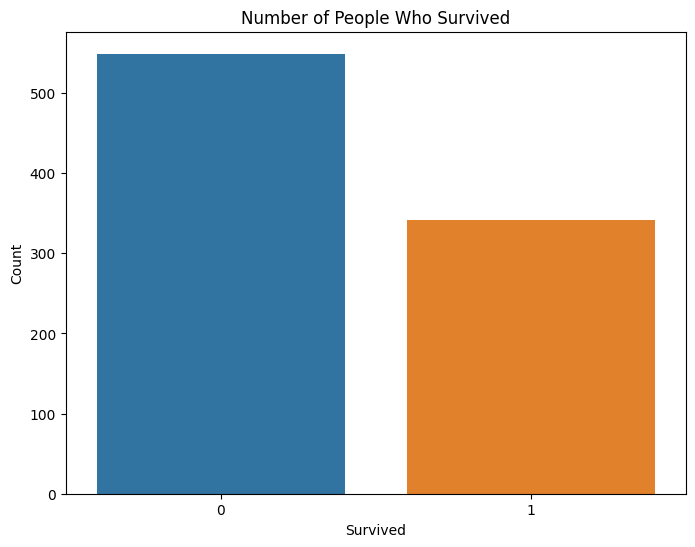

In [5]:


# Create a countplot to show the number of people who survived
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Number of People Who Survived")
plt.show()


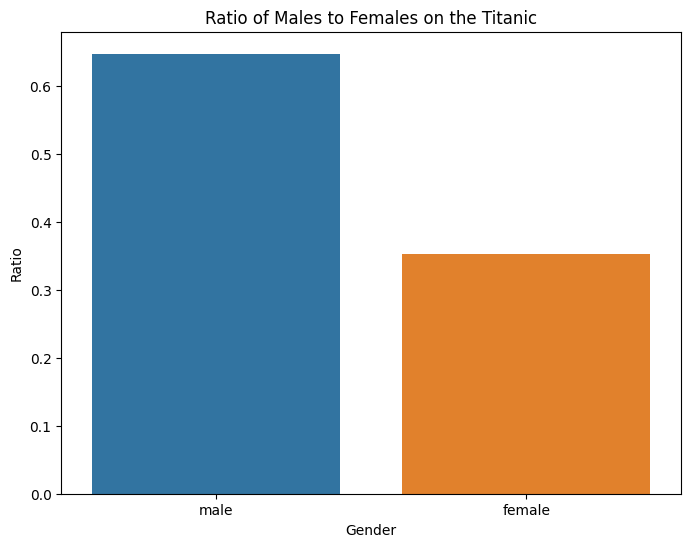

In [6]:
# Calculate the ratio of males to females
gender_ratio = df["sex"].value_counts(normalize=True)

# Create a bar plot to display the gender ratio
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_ratio.index, y=gender_ratio.values)
plt.xlabel("Gender")
plt.ylabel("Ratio")
plt.title("Ratio of Males to Females on the Titanic")
plt.show()


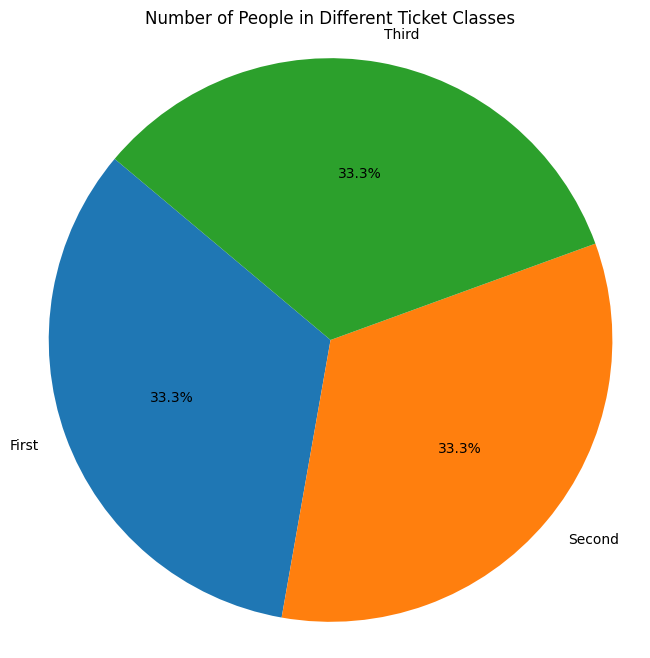

In [7]:

# Deduplicate the data based on the 'class' variable
df_deduplicated = df.drop_duplicates(subset='class')

# Remove rows with null values in the 'class' variable
df_deduplicated = df_deduplicated.dropna(subset=['class'])

# Calculate the number of people in each ticket class
class_counts = df_deduplicated['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of People in Different Ticket Classes")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Interquartile Range (IQR) for all fares: 23.09 dollars


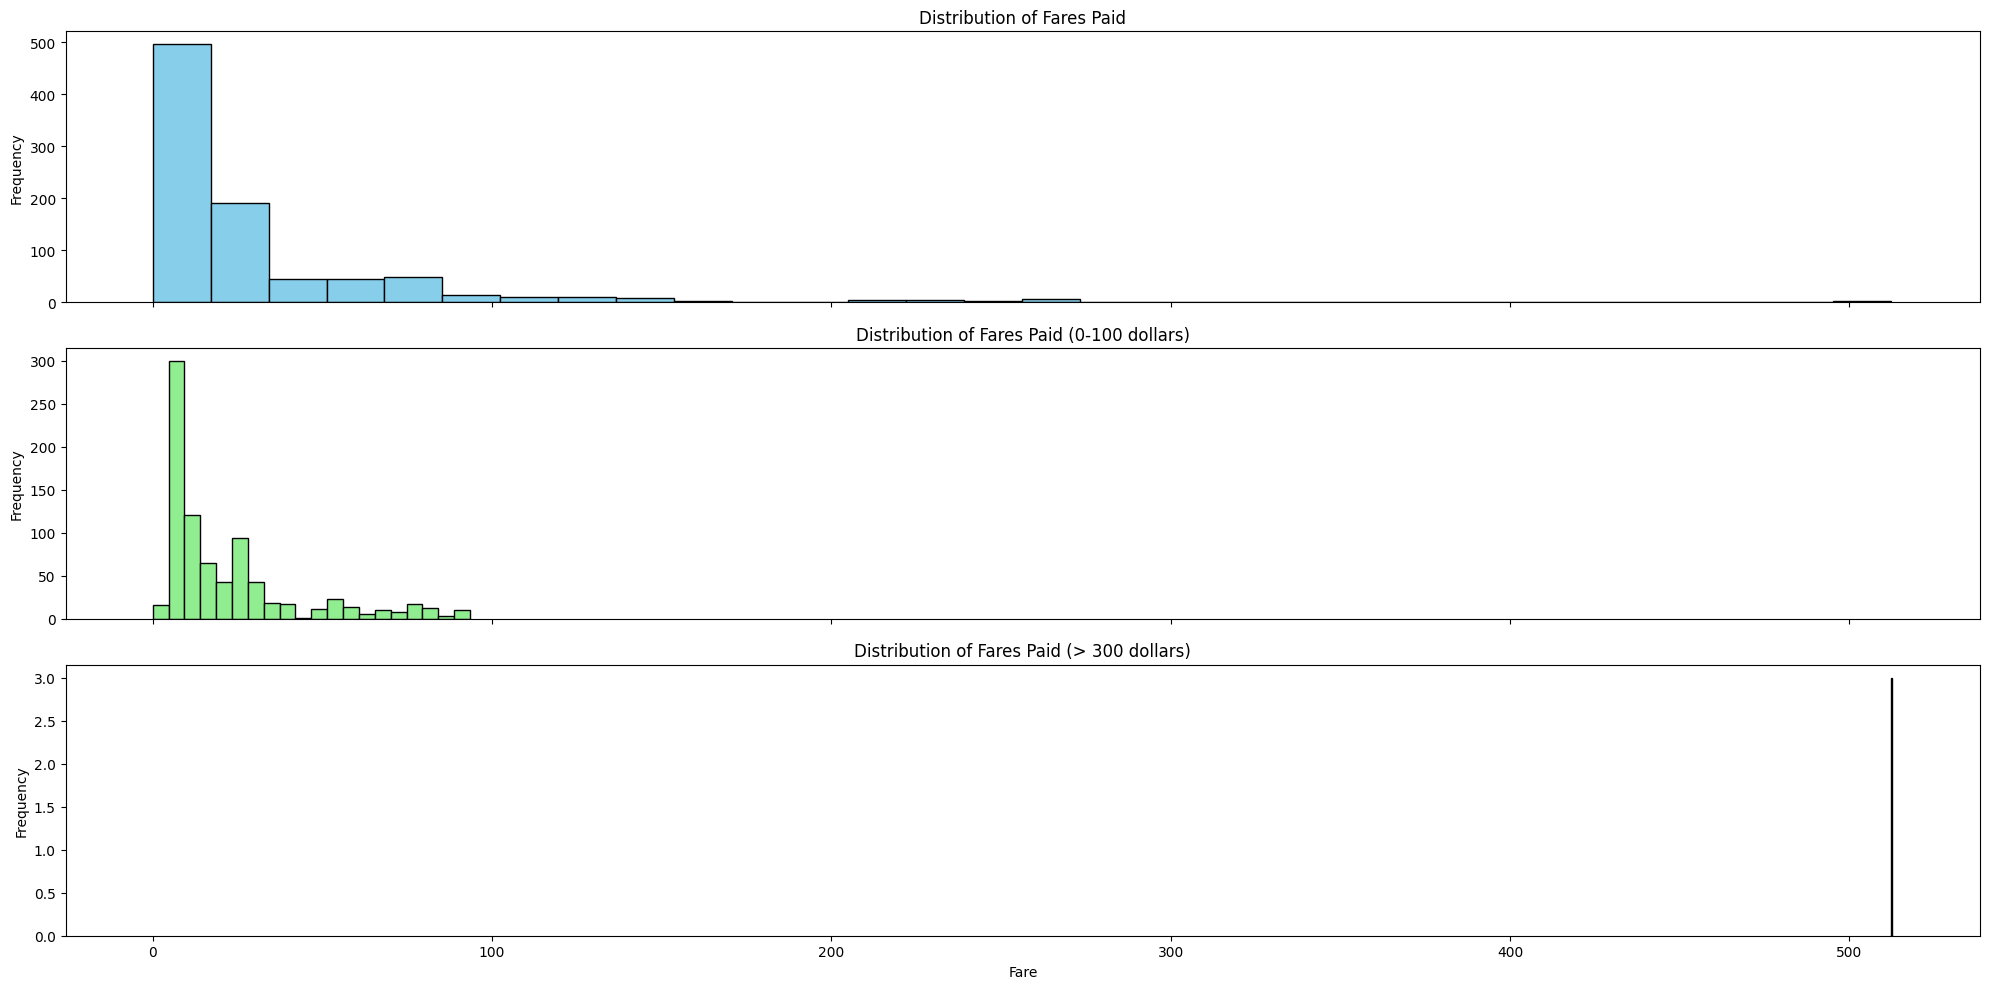

In [8]:
# Filter fares between 0 and 100 dollars
fares_between_0_and_100 = df[(df['fare'] >= 0) & (df['fare'] <= 100)]['fare']

# Filter fares greater than 300 dollars
fares_over_300 = df[df['fare'] > 300]['fare']

# Create subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(20, 10))

# Plot histogram of all fares
ax1.hist(df['fare'], bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Fares Paid')
ax1.set_ylabel('Frequency')

# Plot histogram of fares between 0 and 100 dollars
ax2.hist(fares_between_0_and_100, bins=20, color='lightgreen', edgecolor='black')
ax2.set_title('Distribution of Fares Paid (0-100 dollars)')
ax2.set_ylabel('Frequency')

# Plot histogram of fares over 300 dollars
ax3.hist(fares_over_300, bins=10, color='salmon', edgecolor='black')
ax3.set_title('Distribution of Fares Paid (> 300 dollars)')
ax3.set_xlabel('Fare')
ax3.set_ylabel('Frequency')

# Calculate and print the interquartile range (IQR) for all fares
iqr = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
print(f'Interquartile Range (IQR) for all fares: {iqr:.2f} dollars')

# Show the plots
plt.tight_layout()
plt.show()


In [9]:


# Filter fares between 0 and 100 dollars
fares_between_0_and_100 = df[(df['fare'] >= 0) & (df['fare'] <= 100)]

# Filter fares above 300 dollars
fares_above_300 = df[df['fare'] > 300]

# Calculate the number of people in each group
num_people_between_0_and_100 = len(fares_between_0_and_100)
num_people_above_300 = len(fares_above_300)

print(f'Number of people who paid fare between 0 and 100 dollars: {num_people_between_0_and_100}')
print(f'Number of people who paid fare above 300 dollars: {num_people_above_300}')


Number of people who paid fare between 0 and 100 dollars: 838
Number of people who paid fare above 300 dollars: 3
